# Визуализация датасета PTB-XL

In [1]:
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

In [3]:
def save_obj(obj, name):
    os.makedirs("obj/Test", exist_ok=True)
    with open('obj/Test/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/Test/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
dataset = pd.read_csv('../datasets/No_interval_data.csv', sep=',')
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0           1    1  56.0     NaN    63.0   88.854167    10.836725   
1           2    0  19.0     NaN    70.0   87.304365    12.881166   
2           3    1  37.0     NaN    69.0   82.310648    13.188344   
3           4    0  24.0     NaN    82.0   88.672703    12.592751   
4           5    1  19.0     NaN    70.0   92.718519    10.080940   
...       ...  ...   ...     ...     ...         ...          ...   
21832   21833    1  67.0     NaN     NaN   83.363930    14.132517   
21833   21834    0  93.0     NaN     NaN  100.100000     7.918754   
21834   21835    1  59.0     NaN     NaN   89.650000    10.266897   
21835   21836    1  64.0     NaN     NaN   98.320106    10.089180   
21836   21837    0  68.0     NaN     NaN   84.539286    14.477452   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ALL_C_T_DEV  ALL_C_PR_SEGM_AV  \
0         83.796296       2.678984  163.201852    16.356583         45.900926   
1         84.380952       2.950844  209.904762    21.595540         62.701984   
2         81.148148       4.022570  183.480808    24.391306         52.007407   
3         97.016667       2.889637  179.616667    19.635597         48.495370   
4         86.388889       2.561185  183.248148    19.222976         49.655556   
...             ...            ...         ...          ...               ...   
21832     92.419048      11.880983  108.567796    27.656141         59.759659   
21833     88.633333       2.576820  196.740741    14.319977         50.200000   
21834     90.791667       3.243583  157.833333    24.029279         43.933333   
21835     86.100000       3.770942  177.083333    11.556095         84.820106   
21836     81.333333       2.371708  199.509259    16.276656         74.144048   

       ALL_C_PR_SEGM_DEV  ALL_C_ST_SEGM_AV  ALL_C_ST_SEGM_DEV  NORM  MI  STTC  \
0               7.076908        142.796296          13.337037     1   0     0   
1               8.469103        104.809524          21.079054     1   0     0   
2               9.128249        146.740741          22.119764     1   0     0   
3               8.447915         78.383333          14.863938     1   0     0   
4               8.145649        110.259259          21.850785     1   0     0   
...                  ...               ...                ...   ...  ..   ...   
21832          10.016868        103.385648          24.841330     0   0     1   
21833           5.332917        110.592593          11.342770     1   0     0   
21834           7.617332        169.023810          29.124644     0   0     1   
21835          10.226346        107.100000          10.474413     1   0     0   
21836           9.264125        107.479167          12.467667     1   0     0   

       CD  HYP  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0  
...    ..  ...  
21832   0    0  
21833   0    0  
21834   0    0  
21835   0    0  
21836   0    0  

[21837 rows x 20 columns]

In [5]:
for col in dataset:
    print(f'{col}: {dataset[col].isna().sum()} NaN vals')

ecg_id: 0 NaN vals
SEX: 0 NaN vals
AGE: 89 NaN vals
HEIGHT: 14854 NaN vals
WEIGHT: 12408 NaN vals
ALL_C_P_AV: 0 NaN vals
ALL_C_P_DEV: 0 NaN vals
ALL_C_QRS_AV: 0 NaN vals
ALL_C_QRS_DEV: 0 NaN vals
ALL_C_T_AV: 0 NaN vals
ALL_C_T_DEV: 0 NaN vals
ALL_C_PR_SEGM_AV: 0 NaN vals
ALL_C_PR_SEGM_DEV: 0 NaN vals
ALL_C_ST_SEGM_AV: 0 NaN vals
ALL_C_ST_SEGM_DEV: 0 NaN vals
NORM: 0 NaN vals
MI: 0 NaN vals
STTC: 0 NaN vals
CD: 0 NaN vals
HYP: 0 NaN vals


In [6]:
quantify_nans(dataset)

Missing values 27351 (6.59214322383786%)
Number of complete rows: 6680 (30.590282547969043%)


Уберем строчки без диагноза

In [7]:
list_to_drop = []
for i in range(len(dataset)):
    if (dataset.at[i, 'NORM'] + dataset.at[i, 'MI'] + dataset.at[i, 'STTC'] + dataset.at[i, 'CD'] + dataset.at[i, 'HYP'] == 0):
        list_to_drop.append(i)
        
dataset_dropped = dataset.drop(dataset.index[list_to_drop])
dataset_dropped = dataset_dropped.reset_index(drop=True)
dataset_dropped

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0           1    1  56.0     NaN    63.0   88.854167    10.836725   
1           2    0  19.0     NaN    70.0   87.304365    12.881166   
2           3    1  37.0     NaN    69.0   82.310648    13.188344   
3           4    0  24.0     NaN    82.0   88.672703    12.592751   
4           5    1  19.0     NaN    70.0   92.718519    10.080940   
...       ...  ...   ...     ...     ...         ...          ...   
21425   21833    1  67.0     NaN     NaN   83.363930    14.132517   
21426   21834    0  93.0     NaN     NaN  100.100000     7.918754   
21427   21835    1  59.0     NaN     NaN   89.650000    10.266897   
21428   21836    1  64.0     NaN     NaN   98.320106    10.089180   
21429   21837    0  68.0     NaN     NaN   84.539286    14.477452   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ALL_C_T_DEV  ALL_C_PR_SEGM_AV  \
0         83.796296       2.678984  163.201852    16.356583         45.900926   
1         84.380952       2.950844  209.904762    21.595540         62.701984   
2         81.148148       4.022570  183.480808    24.391306         52.007407   
3         97.016667       2.889637  179.616667    19.635597         48.495370   
4         86.388889       2.561185  183.248148    19.222976         49.655556   
...             ...            ...         ...          ...               ...   
21425     92.419048      11.880983  108.567796    27.656141         59.759659   
21426     88.633333       2.576820  196.740741    14.319977         50.200000   
21427     90.791667       3.243583  157.833333    24.029279         43.933333   
21428     86.100000       3.770942  177.083333    11.556095         84.820106   
21429     81.333333       2.371708  199.509259    16.276656         74.144048   

       ALL_C_PR_SEGM_DEV  ALL_C_ST_SEGM_AV  ALL_C_ST_SEGM_DEV  NORM  MI  STTC  \
0               7.076908        142.796296          13.337037     1   0     0   
1               8.469103        104.809524          21.079054     1   0     0   
2               9.128249        146.740741          22.119764     1   0     0   
3               8.447915         78.383333          14.863938     1   0     0   
4               8.145649        110.259259          21.850785     1   0     0   
...                  ...               ...                ...   ...  ..   ...   
21425          10.016868        103.385648          24.841330     0   0     1   
21426           5.332917        110.592593          11.342770     1   0     0   
21427           7.617332        169.023810          29.124644     0   0     1   
21428          10.226346        107.100000          10.474413     1   0     0   
21429           9.264125        107.479167          12.467667     1   0     0   

       CD  HYP  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0  
...    ..  ...  
21425   0    0  
21426   0    0  
21427   0    0  
21428   0    0  
21429   0    0  

[21430 rows x 20 columns]

Разобьем строчки с множественными диагнозами по принципу one-hot encoding

In [8]:
multi_ixs = dataset_dropped[(dataset_dropped['NORM'] + dataset_dropped['MI'] + dataset_dropped['STTC'] + dataset_dropped['CD'] + dataset_dropped['HYP'] > 1)].index
multi_ixs

rows = []
for ix in multi_ixs:
    for col in ['NORM', 'MI', 'STTC', 'CD', 'HYP']:
        if (dataset_dropped.at[ix, col] == 1):
            row = dataset_dropped.iloc[ix].copy()
            for tmp_col in ['NORM', 'MI', 'STTC', 'CD', 'HYP']:
                if col != tmp_col:
                    row[tmp_col] = 0
            rows.append(row)

dataset_dropped = dataset_dropped.append(rows).reset_index(drop=True)
dataset_dropped = dataset_dropped.drop(multi_ixs).reset_index(drop=True)
dataset_dropped

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0          1.0  1.0  56.0     NaN    63.0   88.854167    10.836725   
1          2.0  0.0  19.0     NaN    70.0   87.304365    12.881166   
2          3.0  1.0  37.0     NaN    69.0   82.310648    13.188344   
3          4.0  0.0  24.0     NaN    82.0   88.672703    12.592751   
4          5.0  1.0  19.0     NaN    70.0   92.718519    10.080940   
...        ...  ...   ...     ...     ...         ...          ...   
27821  21827.0  1.0  79.0     NaN     NaN   65.711111    10.065820   
27822  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
27823  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
27824  21829.0  1.0  69.0     NaN     NaN   91.623148     8.659738   
27825  21829.0  1.0  69.0     NaN     NaN   91.623148     8.659738   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ALL_C_T_DEV  ALL_C_PR_SEGM_AV  \
0         83.796296       2.678984  163.201852    16.356583         45.900926   
1         84.380952       2.950844  209.904762    21.595540         62.701984   
2         81.148148       4.022570  183.480808    24.391306         52.007407   
3         97.016667       2.889637  179.616667    19.635597         48.495370   
4         86.388889       2.561185  183.248148    19.222976         49.655556   
...             ...            ...         ...          ...               ...   
27821    115.335185      19.436315  186.168981    47.835704         70.872222   
27822    110.725758      16.007926  184.752525    30.887792         78.791667   
27823    110.725758      16.007926  184.752525    30.887792         78.791667   
27824     89.183333       3.279736  169.148148    16.382265         46.106019   
27825     89.183333       3.279736  169.148148    16.382265         46.106019   

       ALL_C_PR_SEGM_DEV  ALL_C_ST_SEGM_AV  ALL_C_ST_SEGM_DEV  NORM   MI  \
0               7.076908        142.796296          13.337037   1.0  0.0   
1               8.469103        104.809524          21.079054   1.0  0.0   
2               9.128249        146.740741          22.119764   1.0  0.0   
3               8.447915         78.383333          14.863938   1.0  0.0   
4               8.145649        110.259259          21.850785   1.0  0.0   
...                  ...               ...                ...   ...  ...   
27821          13.694126        144.520833          63.302097   0.0  0.0   
27822          18.590308        119.276094          22.078023   0.0  1.0   
27823          18.590308        119.276094          22.078023   0.0  0.0   
27824           6.930727        120.814815          16.427669   1.0  0.0   
27825           6.930727        120.814815          16.427669   0.0  0.0   

       STTC   CD  HYP  
0       0.0  0.0  0.0  
1       0.0  0.0  0.0  
2       0.0  0.0  0.0  
3       0.0  0.0  0.0  
4       0.0  0.0  0.0  
...     ...  ...  ...  
27821   1.0  0.0  0.0  
27822   0.0  0.0  0.0  
27823   1.0  0.0  0.0  
27824   0.0  0.0  0.0  
27825   0.0  1.0  0.0  

[27826 rows x 20 columns]

In [9]:
dataset_unhealthy = dataset_dropped.drop(dataset_dropped[(dataset_dropped['NORM'] == 1)].index).reset_index(drop=True)
dataset_unhealthy = dataset_unhealthy.drop(['NORM'], axis=1)
dataset_raw = dataset_dropped.drop(['NORM', 'MI', 'STTC', 'CD', 'HYP'], axis=1)
dataset_raw_unhealthy = dataset_unhealthy.drop(['MI', 'STTC', 'CD', 'HYP'], axis=1)
dataset_unhealthy

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0          8.0  0.0  48.0     NaN    95.0  100.316667    12.131639   
1         22.0  1.0  17.0     NaN    53.0   88.981818     8.289819   
2         26.0  0.0  56.0     NaN     NaN   90.082492    15.961563   
3         28.0  0.0  56.0     NaN     NaN   83.306870    18.644523   
4         30.0  0.0  25.0     NaN    83.0  104.335648     8.618019   
...        ...  ...   ...     ...     ...         ...          ...   
18293  21827.0  1.0  79.0     NaN     NaN   65.711111    10.065820   
18294  21827.0  1.0  79.0     NaN     NaN   65.711111    10.065820   
18295  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
18296  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
18297  21829.0  1.0  69.0     NaN     NaN   91.623148     8.659738   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ALL_C_T_DEV  ALL_C_PR_SEGM_AV  \
0         85.550000       2.744085  178.900000    12.340719         76.300000   
1         85.393939       1.674637  164.712121    10.860498         50.475000   
2         97.666667       3.079953  152.022436    24.195624         80.789941   
3         90.172619       5.383836  124.888889    23.532573         69.916925   
4        112.518519       1.730862  212.740741    16.050332         66.331019   
...             ...            ...         ...          ...               ...   
18293    115.335185      19.436315  186.168981    47.835704         70.872222   
18294    115.335185      19.436315  186.168981    47.835704         70.872222   
18295    110.725758      16.007926  184.752525    30.887792         78.791667   
18296    110.725758      16.007926  184.752525    30.887792         78.791667   
18297     89.183333       3.279736  169.148148    16.382265         46.106019   

       ALL_C_PR_SEGM_DEV  ALL_C_ST_SEGM_AV  ALL_C_ST_SEGM_DEV   MI  STTC   CD  \
0               8.329466         93.866667          11.193748  1.0   0.0  0.0   
1               7.425126        112.772727           7.997589  0.0   1.0  0.0   
2              13.144295        101.794192          19.250009  0.0   1.0  0.0   
3              15.098691        131.702020          21.606788  0.0   1.0  0.0   
4               8.658260         84.925926           9.846977  0.0   0.0  0.0   
...                  ...               ...                ...  ...   ...  ...   
18293          13.694126        144.520833          63.302097  1.0   0.0  0.0   
18294          13.694126        144.520833          63.302097  0.0   1.0  0.0   
18295          18.590308        119.276094          22.078023  1.0   0.0  0.0   
18296          18.590308        119.276094          22.078023  0.0   1.0  0.0   
18297           6.930727        120.814815          16.427669  0.0   0.0  1.0   

       HYP  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      1.0  
...    ...  
18293  0.0  
18294  0.0  
18295  0.0  
18296  0.0  
18297  0.0  

[18298 rows x 19 columns]

In [10]:
dataset_raw

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0          1.0  1.0  56.0     NaN    63.0   88.854167    10.836725   
1          2.0  0.0  19.0     NaN    70.0   87.304365    12.881166   
2          3.0  1.0  37.0     NaN    69.0   82.310648    13.188344   
3          4.0  0.0  24.0     NaN    82.0   88.672703    12.592751   
4          5.0  1.0  19.0     NaN    70.0   92.718519    10.080940   
...        ...  ...   ...     ...     ...         ...          ...   
27821  21827.0  1.0  79.0     NaN     NaN   65.711111    10.065820   
27822  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
27823  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
27824  21829.0  1.0  69.0     NaN     NaN   91.623148     8.659738   
27825  21829.0  1.0  69.0     NaN     NaN   91.623148     8.659738   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ALL_C_T_DEV  ALL_C_PR_SEGM_AV  \
0         83.796296       2.678984  163.201852    16.356583         45.900926   
1         84.380952       2.950844  209.904762    21.595540         62.701984   
2         81.148148       4.022570  183.480808    24.391306         52.007407   
3         97.016667       2.889637  179.616667    19.635597         48.495370   
4         86.388889       2.561185  183.248148    19.222976         49.655556   
...             ...            ...         ...          ...               ...   
27821    115.335185      19.436315  186.168981    47.835704         70.872222   
27822    110.725758      16.007926  184.752525    30.887792         78.791667   
27823    110.725758      16.007926  184.752525    30.887792         78.791667   
27824     89.183333       3.279736  169.148148    16.382265         46.106019   
27825     89.183333       3.279736  169.148148    16.382265         46.106019   

       ALL_C_PR_SEGM_DEV  ALL_C_ST_SEGM_AV  ALL_C_ST_SEGM_DEV  
0               7.076908        142.796296          13.337037  
1               8.469103        104.809524          21.079054  
2               9.128249        146.740741          22.119764  
3               8.447915         78.383333          14.863938  
4               8.145649        110.259259          21.850785  
...                  ...               ...                ...  
27821          13.694126        144.520833          63.302097  
27822          18.590308        119.276094          22.078023  
27823          18.590308        119.276094          22.078023  
27824           6.930727        120.814815          16.427669  
27825           6.930727        120.814815          16.427669  

[27826 rows x 15 columns]

In [11]:
dataset_raw_unhealthy

ecg_id  SEX   AGE  HEIGHT  WEIGHT  ALL_C_P_AV  ALL_C_P_DEV  \
0          8.0  0.0  48.0     NaN    95.0  100.316667    12.131639   
1         22.0  1.0  17.0     NaN    53.0   88.981818     8.289819   
2         26.0  0.0  56.0     NaN     NaN   90.082492    15.961563   
3         28.0  0.0  56.0     NaN     NaN   83.306870    18.644523   
4         30.0  0.0  25.0     NaN    83.0  104.335648     8.618019   
...        ...  ...   ...     ...     ...         ...          ...   
18293  21827.0  1.0  79.0     NaN     NaN   65.711111    10.065820   
18294  21827.0  1.0  79.0     NaN     NaN   65.711111    10.065820   
18295  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
18296  21828.0  1.0  79.0     NaN     NaN   64.097222    15.379986   
18297  21829.0  1.0  69.0     NaN     NaN   91.623148     8.659738   

       ALL_C_QRS_AV  ALL_C_QRS_DEV  ALL_C_T_AV  ALL_C_T_DEV  ALL_C_PR_SEGM_AV  \
0         85.550000       2.744085  178.900000    12.340719         76.300000   
1         85.393939       1.674637  164.712121    10.860498         50.475000   
2         97.666667       3.079953  152.022436    24.195624         80.789941   
3         90.172619       5.383836  124.888889    23.532573         69.916925   
4        112.518519       1.730862  212.740741    16.050332         66.331019   
...             ...            ...         ...          ...               ...   
18293    115.335185      19.436315  186.168981    47.835704         70.872222   
18294    115.335185      19.436315  186.168981    47.835704         70.872222   
18295    110.725758      16.007926  184.752525    30.887792         78.791667   
18296    110.725758      16.007926  184.752525    30.887792         78.791667   
18297     89.183333       3.279736  169.148148    16.382265         46.106019   

       ALL_C_PR_SEGM_DEV  ALL_C_ST_SEGM_AV  ALL_C_ST_SEGM_DEV  
0               8.329466         93.866667          11.193748  
1               7.425126        112.772727           7.997589  
2              13.144295        101.794192          19.250009  
3              15.098691        131.702020          21.606788  
4               8.658260         84.925926           9.846977  
...                  ...               ...                ...  
18293          13.694126        144.520833          63.302097  
18294          13.694126        144.520833          63.302097  
18295          18.590308        119.276094          22.078023  
18296          18.590308        119.276094          22.078023  
18297           6.930727        120.814815          16.427669  

[18298 rows x 15 columns]

In [12]:
dataset_dropped = dataset_dropped.drop('ecg_id', axis=1)
dataset_unhealthy = dataset_unhealthy.drop('ecg_id', axis=1)
dataset_raw = dataset_raw.drop('ecg_id', axis=1)
dataset_raw_unhealthy = dataset_raw_unhealthy.drop('ecg_id', axis=1)

## План

Построим кучу деревьев на основе:
1. Масштабирования: нормализации, стандартизации, оптимизации (если это так можно назвать),
2. 2D/3D.

## 1. Обработка датасета

### Нормализация и стандартизация

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

datasets = [dataset_dropped, dataset_unhealthy, dataset_raw, dataset_raw_unhealthy]
X_data_prep = [num_pipeline.fit_transform(X_data_raw) for X_data_raw in datasets]
X_prep = [pd.DataFrame(X) for X in X_data_prep]

In [14]:
classes_all = []
classes_unhealthy = []
for i in range(len(dataset_dropped)):
    for j, col in zip([0, 1, 2, 3, 4], ['NORM', 'MI', 'STTC', 'CD', 'HYP']):
        if (dataset_dropped.at[i, col]):
            classes_all.append(j)

for i in range(len(dataset_unhealthy)):
    for j, col in zip([1, 2, 3, 4], ['MI', 'STTC', 'CD', 'HYP']):
        if (dataset_unhealthy.at[i, col]):
            classes_unhealthy.append(j)
            
            
len(classes_all), len(classes_unhealthy)

(27826, 18298)

## 2. Построение деревьев

In [15]:
import elpigraph
from elpigraph import computeElasticPrincipalTree

nnodes = 50
X_norm = [X.to_numpy() for X in X_prep]

In [16]:
def do_PCA(X):
    reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:, 0:reduced_dimension], v, mean_val 

pack = [do_PCA(X) for X in X_norm]

X_pca_norm = [pack[i][0] for i in range(len(pack))]
components_norm = [pack[i][1] for i in range(len(pack))]
mnval_norm = [pack[i][2] for i in range(len(pack))]

In [17]:
def create_extended_tree(X, nnodes):
    tree_elpi = computeElasticPrincipalTree(X, nnodes, alpha=0.01, Mu=0.1, Lambda=0.05, FinalEnergy='Penalized')[0]
    prune_the_tree(tree_elpi)
    tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
    return tree_extended
'''
PTB_tree_norm = [create_extended_tree(X, 50) for X in X_pca_norm]
'''

'\nPTB_tree_norm = [create_extended_tree(X, 50) for X in X_pca_norm]\n'

In [18]:
'''
save_obj(PTB_tree_norm, "PTB_tree_norm")
'''

'\nsave_obj(PTB_tree_norm, "PTB_tree_norm")\n'

In [19]:
PTB_tree_norm = load_obj("PTB_tree_norm")

In [20]:
variable_names = [[str(s) for s in data.columns[:]] for data in datasets]
datasets_orig = [pd.DataFrame(SimpleImputer(strategy="median").fit_transform(data), 
                              columns=var_names) for data, var_names in zip(datasets, variable_names)]

datasets_orig[0]['CLASS'] = classes_all
datasets_orig[1]['CLASS'] = classes_unhealthy
datasets_orig[2]['CLASS'] = classes_all
datasets_orig[3]['CLASS'] = classes_unhealthy
variable_names = [[str(s) for s in data.columns[:]] for data in datasets_orig]
datasets_orig = [data.to_numpy() for data in datasets_orig]

## 3. Визуализация деревьев

### Окраска ветвей деревьев

In [21]:
def tree_visualization(tree_elpi, X, X_orig, components_vec, mean_val):
    vec_labels_by_branches = partition_data_by_tree_branches(X, tree_elpi)

    partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = tree_elpi['NodePositions'], 
                                                        SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                        MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                        )
    partition_by_node = np.zeros(len(partition))
    for i,p in enumerate(partition):
        partition_by_node[i] = p[0]

    variable_names = [str(s) for s in dataset.columns[1:]]
    visualize_eltree_with_data(tree_elpi, X, X_orig, components_vec, mean_val, 'k', variable_names,
                              Color_by_partitioning = True, visualize_partition = vec_labels_by_branches)

In [22]:
figsize=(15, 12)

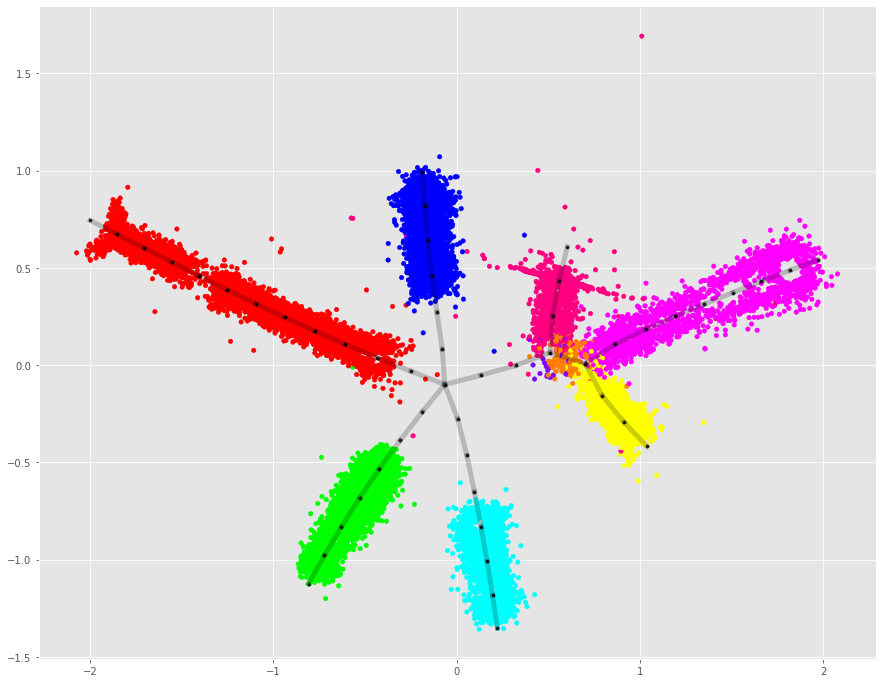

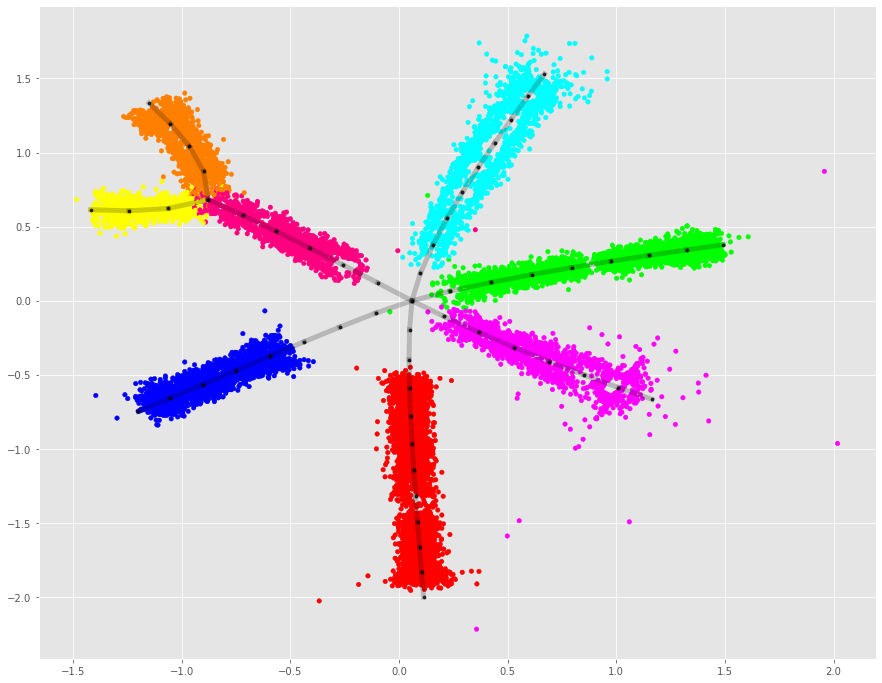

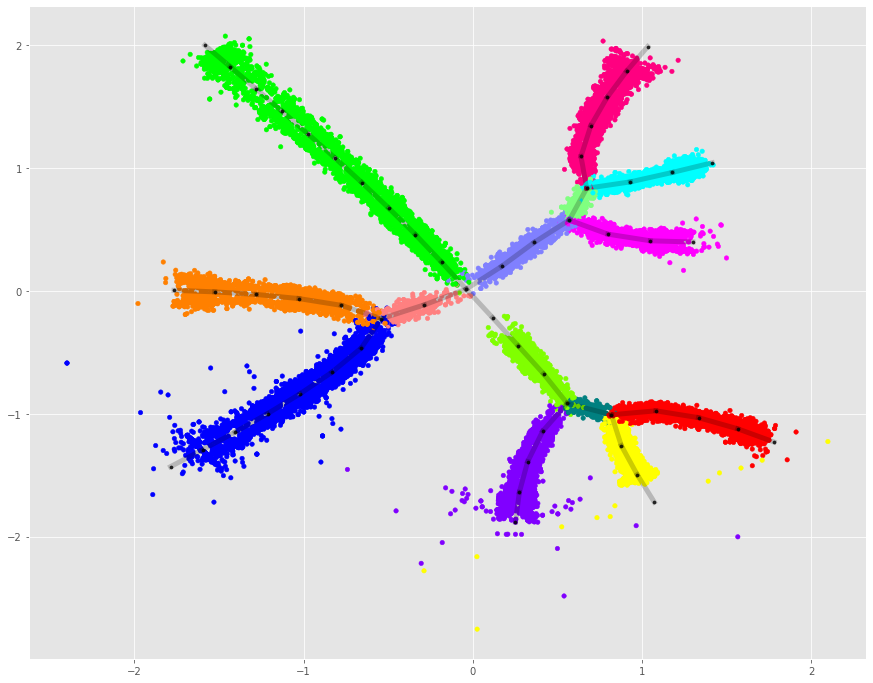

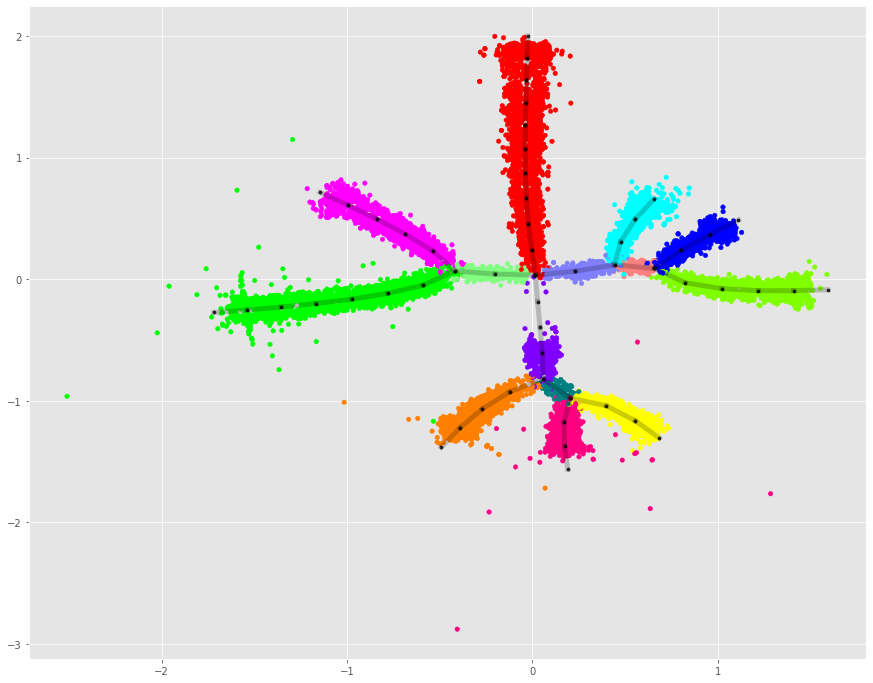

In [23]:
for tree, X_pca, data_orig, components, mnval in zip(PTB_tree_norm, X_pca_norm, datasets_orig, components_norm, mnval_norm):
    fig = plt.figure(figsize=figsize)
    tree_visualization(tree, X_pca, data_orig, components, mnval)
    plt.show()

### Визуализация атрибутов и исследование деревьев

#### Нормализация

In [34]:
data_names = ['все пациенты, дерево построено с использованием итоговых классов.', 
              'больные пациенты, дерево построено с использованием итоговых классов.', 
              'все пациенты, дерево построено без использования итоговых классов.', 
              'больные пациенты, дерево построено без использования итоговых классов.']

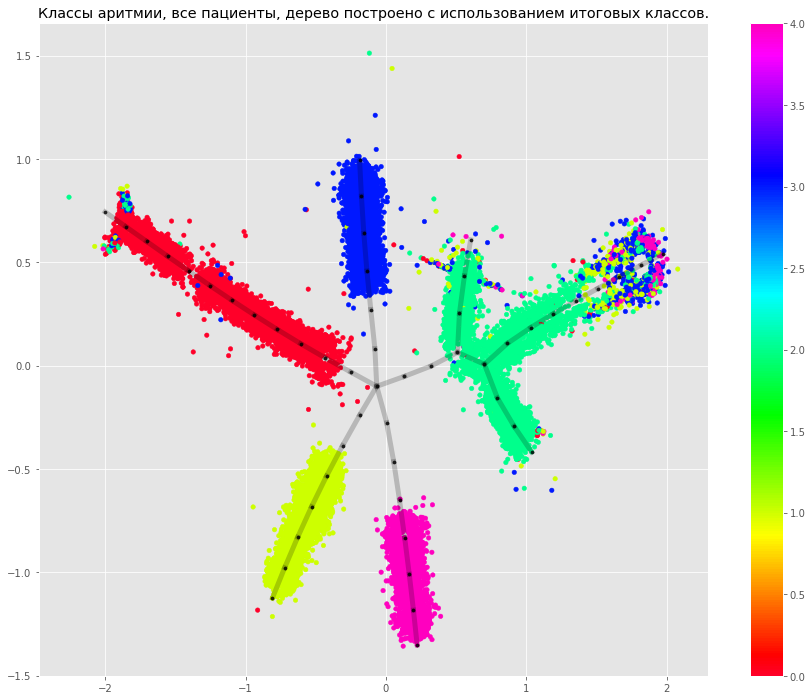

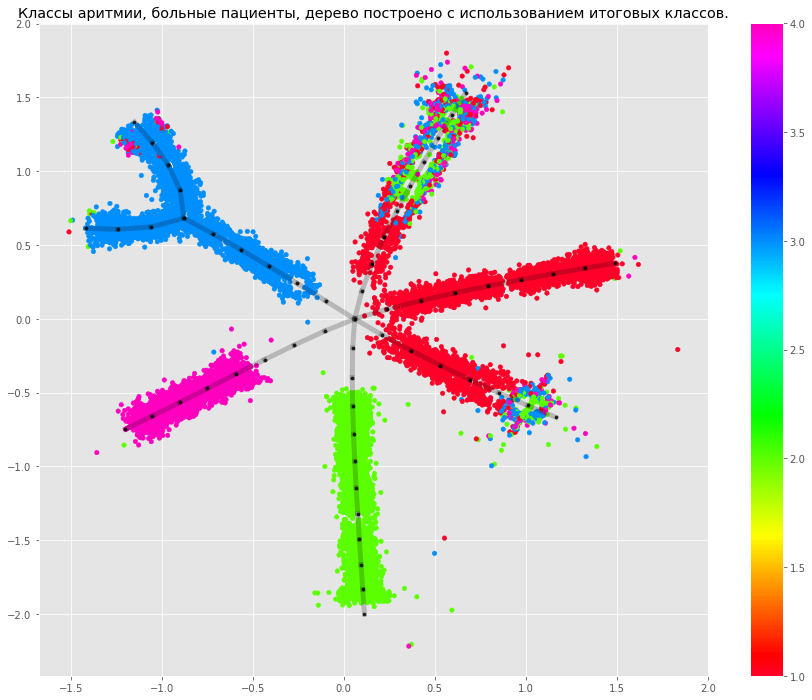

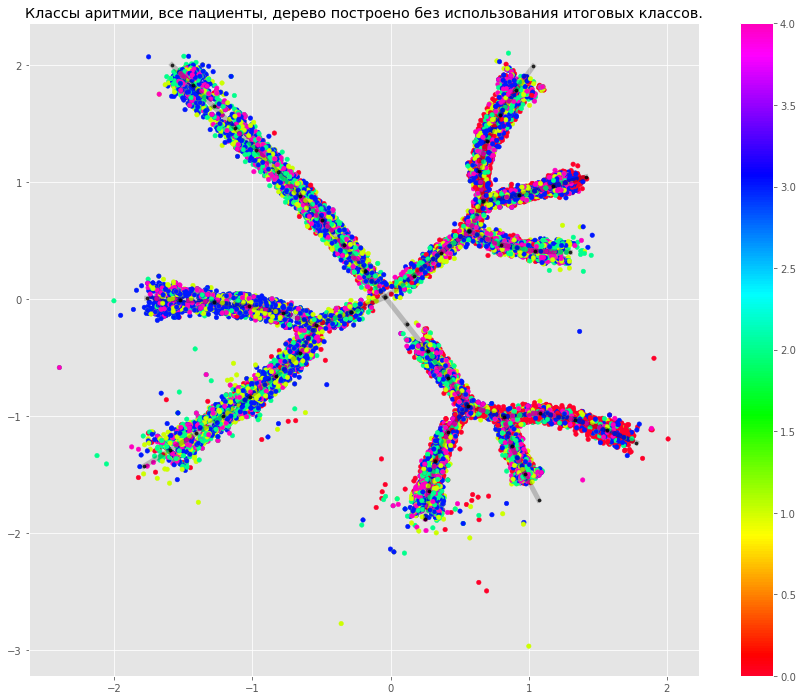

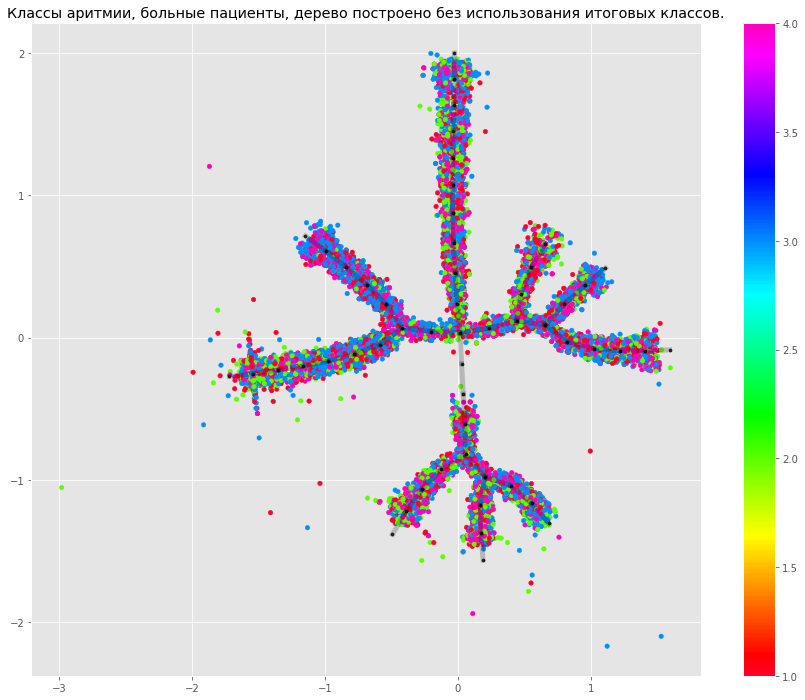

In [35]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(PTB_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='CLASS', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Классы аритмии, " + data_name)
    plt.show()

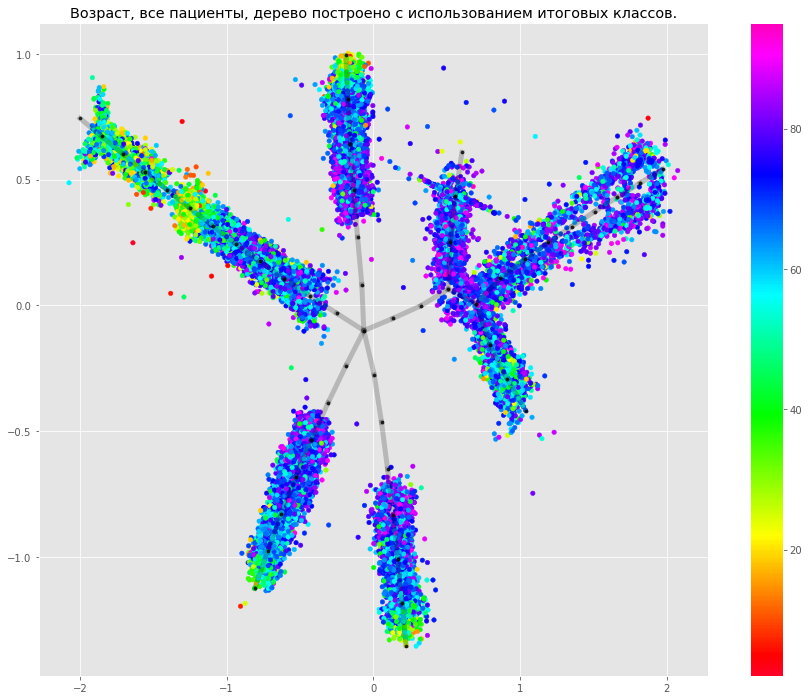

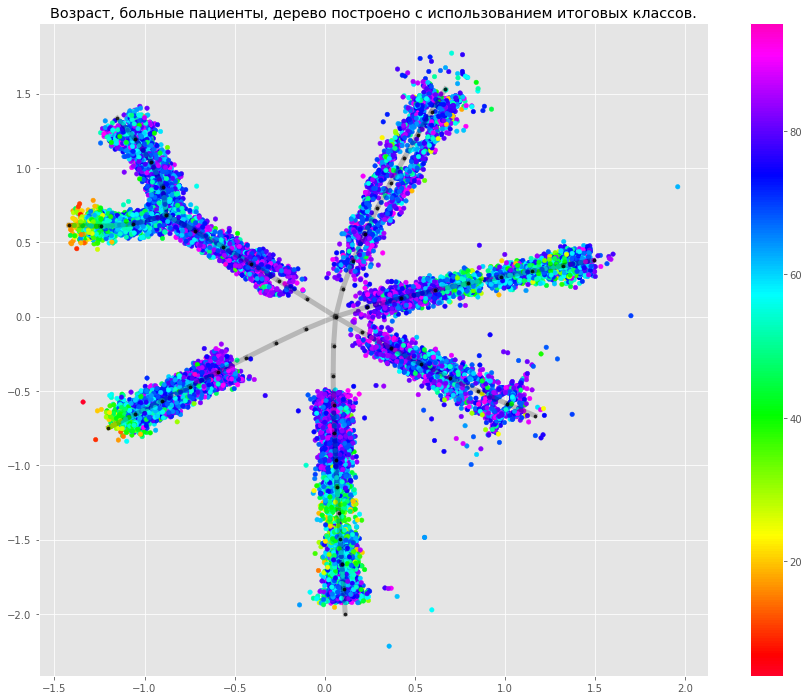

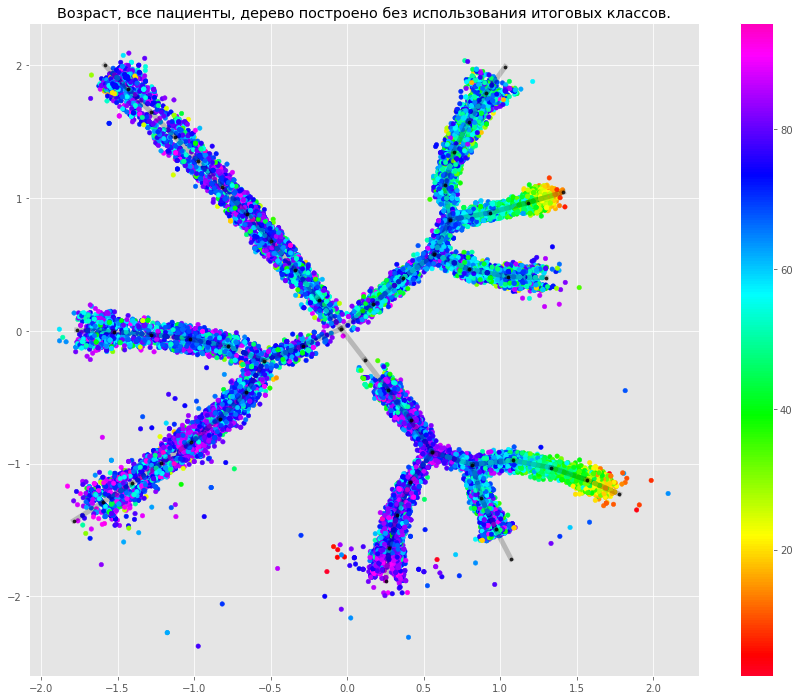

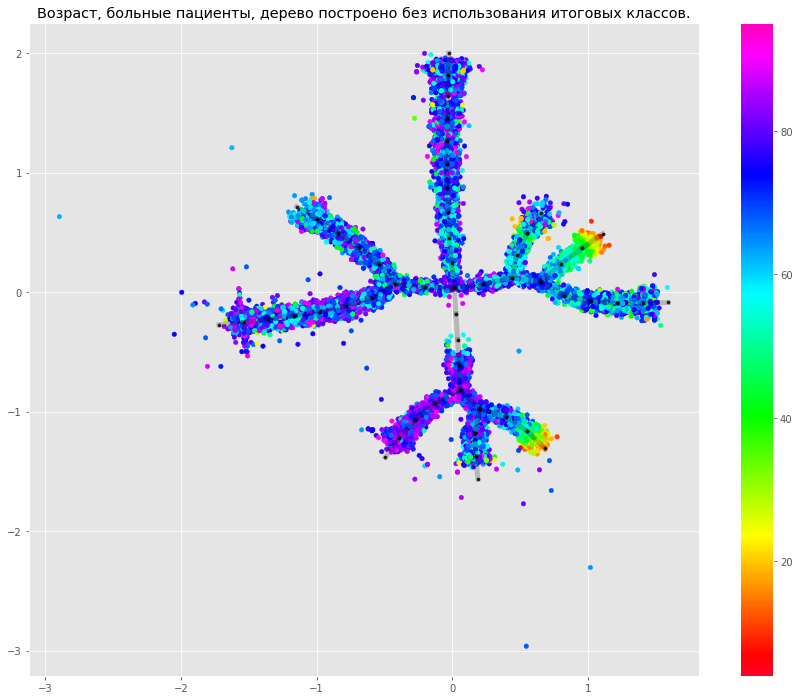

In [36]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(PTB_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='AGE', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Возраст, " + data_name)
    plt.show()

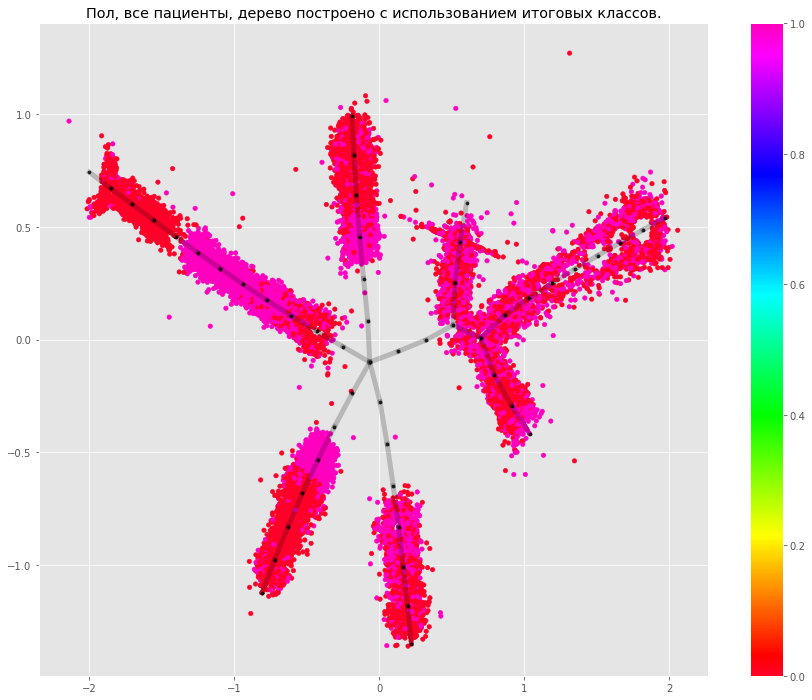

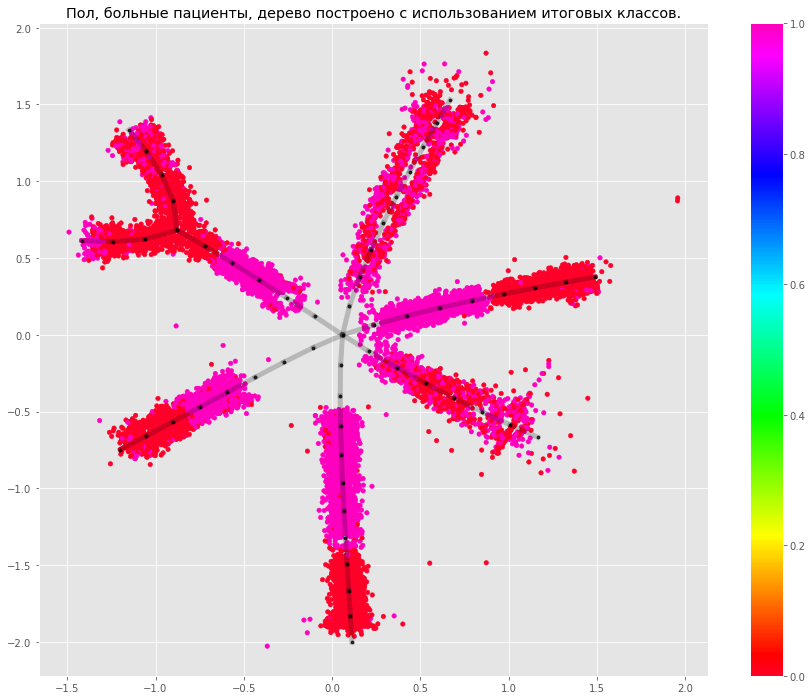

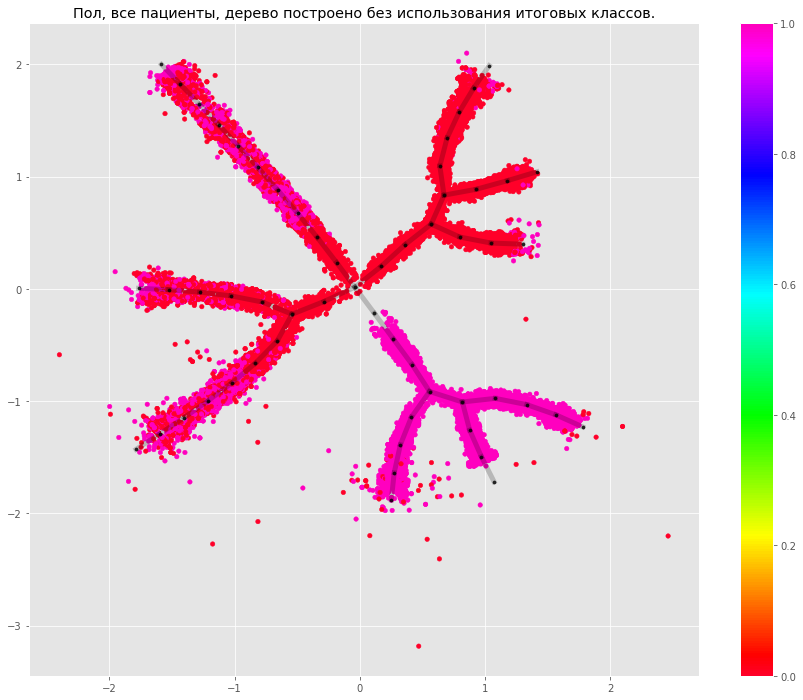

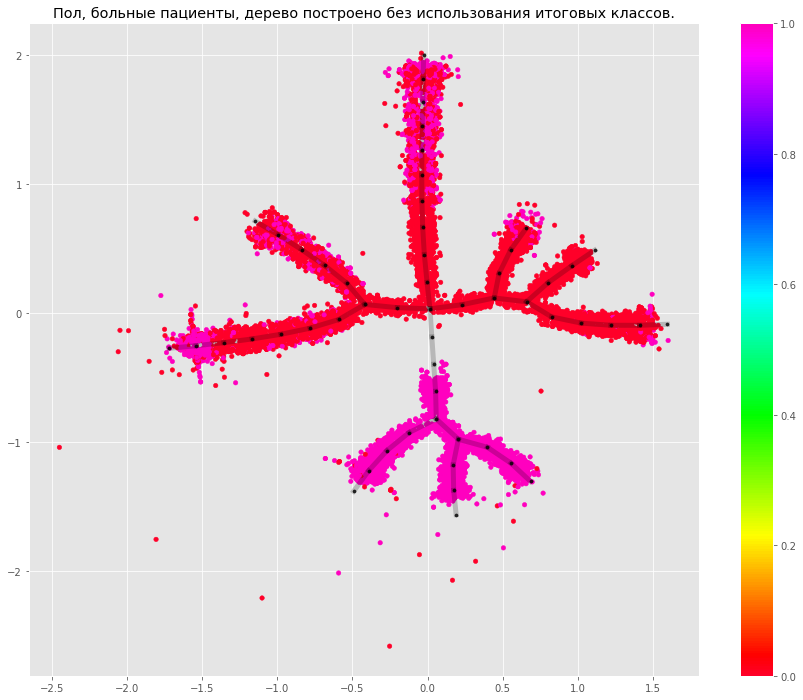

In [37]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(PTB_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='SEX', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Пол, " + data_name)
    plt.show()

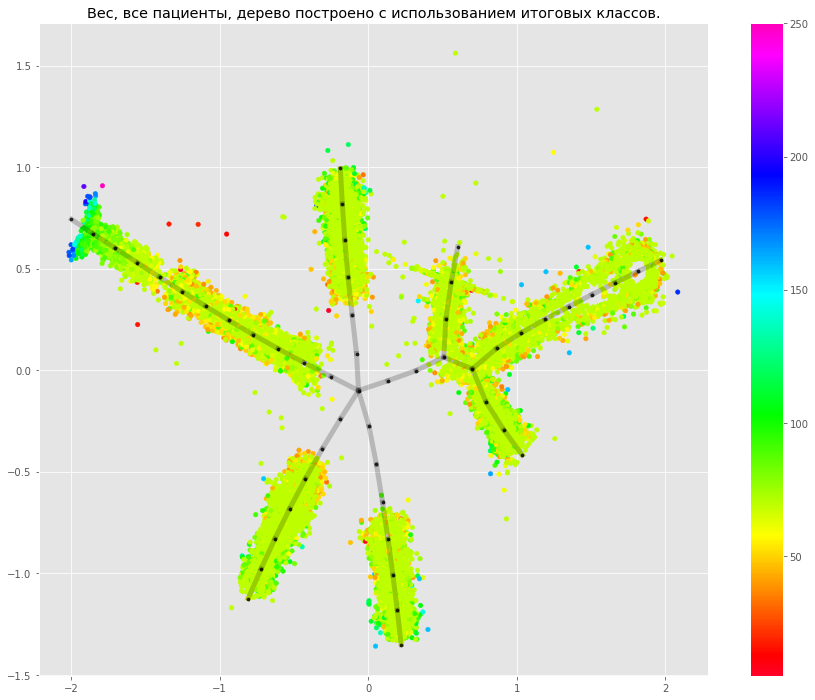

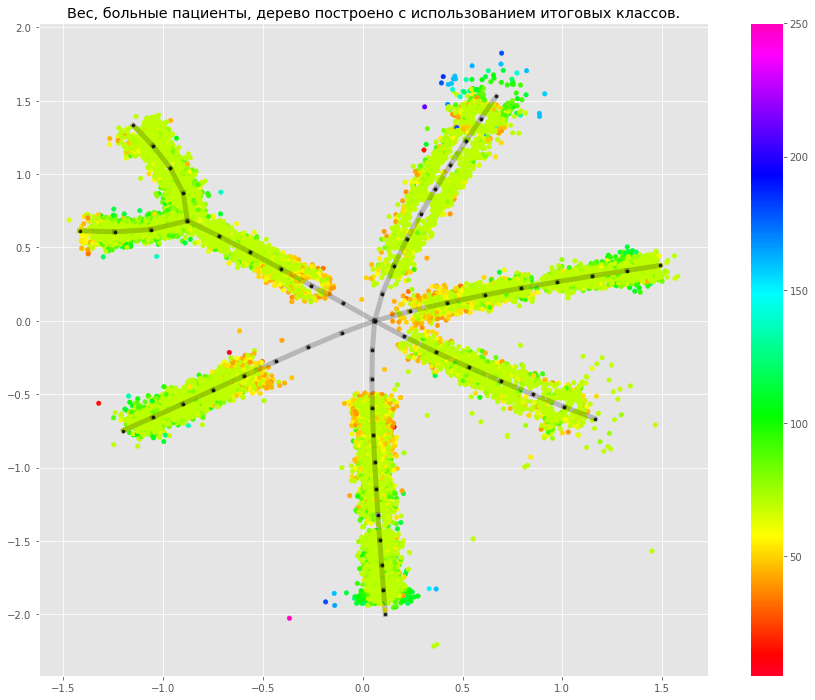

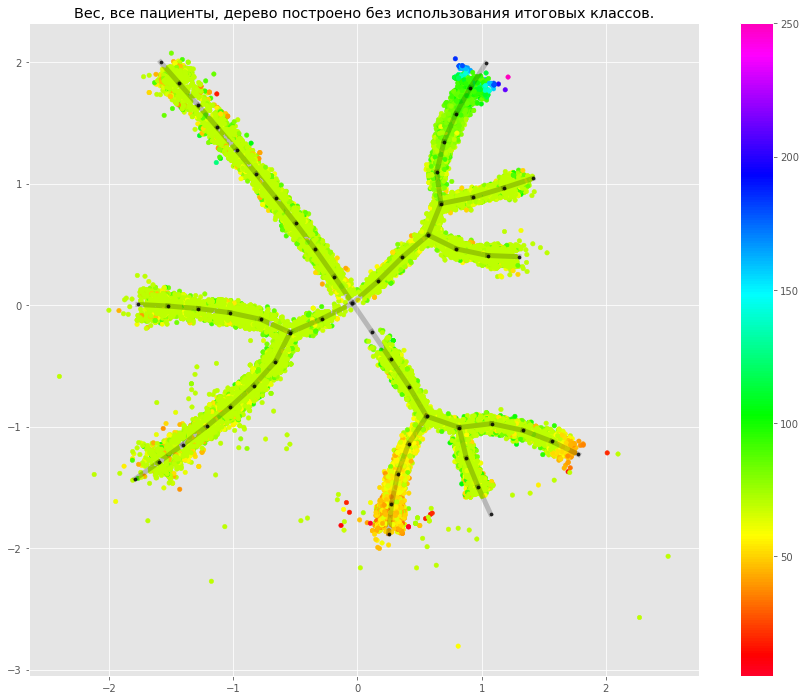

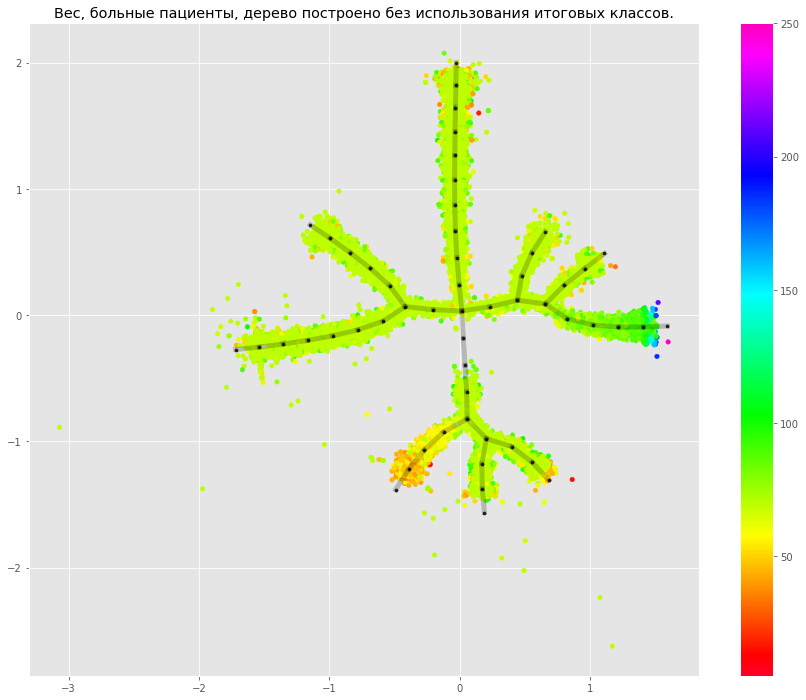

In [38]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(PTB_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='WEIGHT', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Вес, " + data_name)
    plt.show()

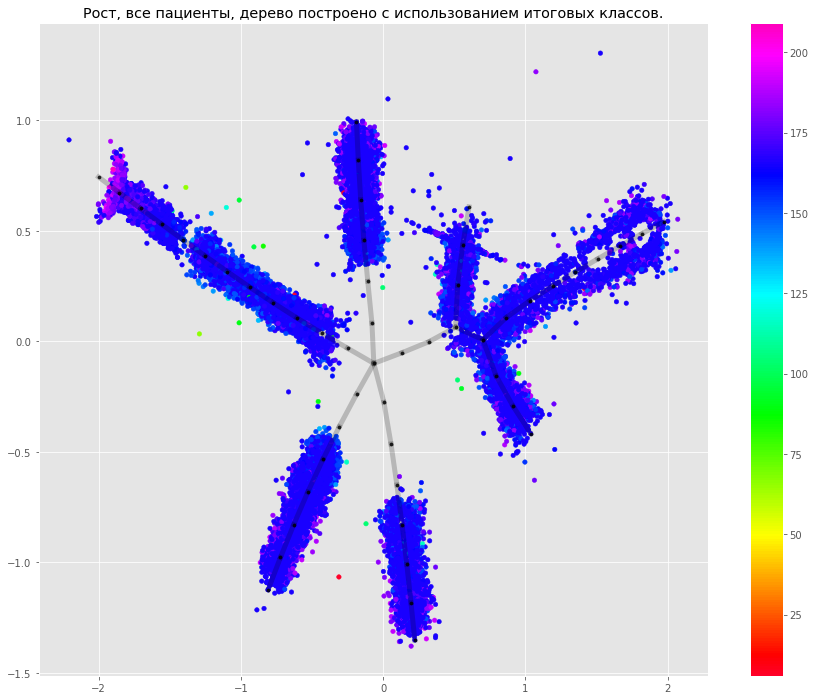

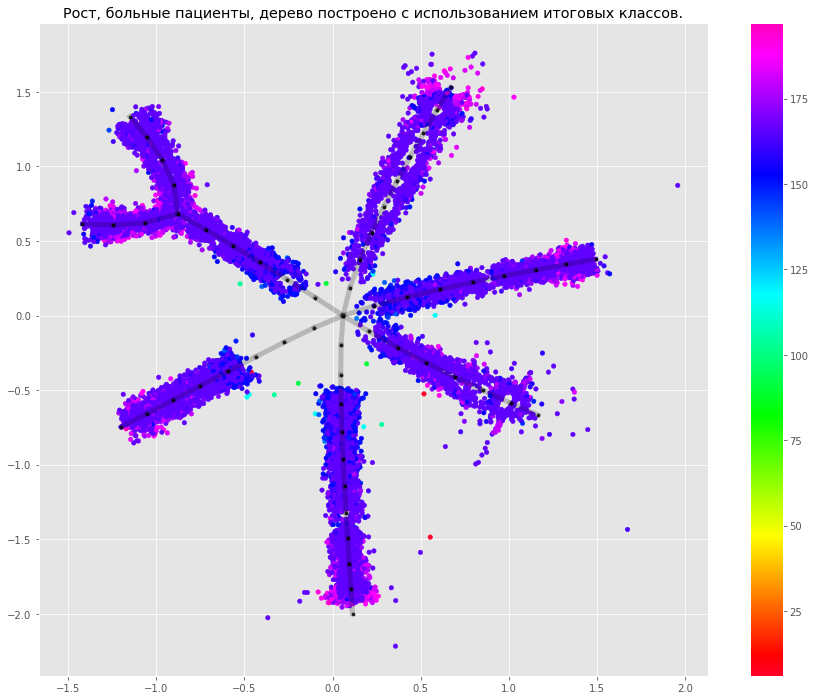

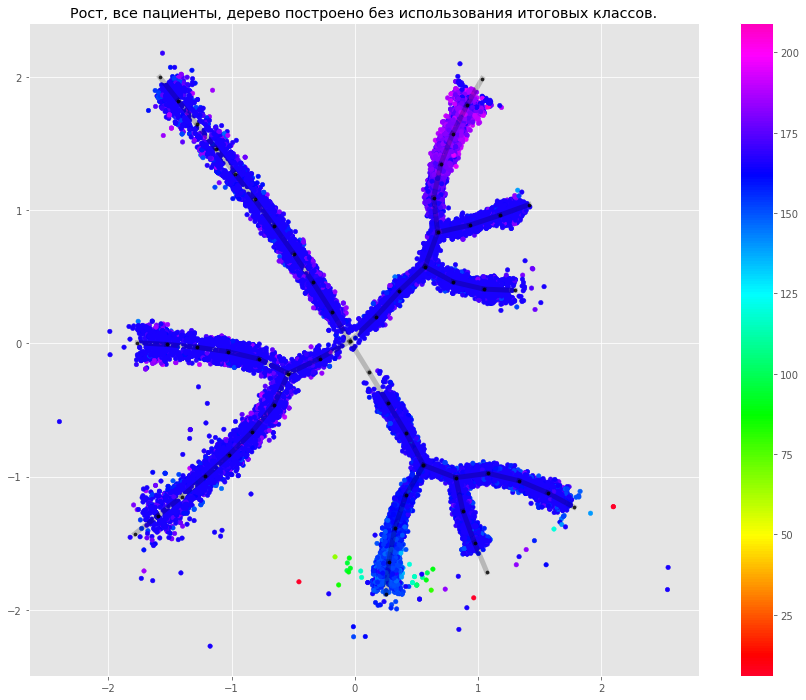

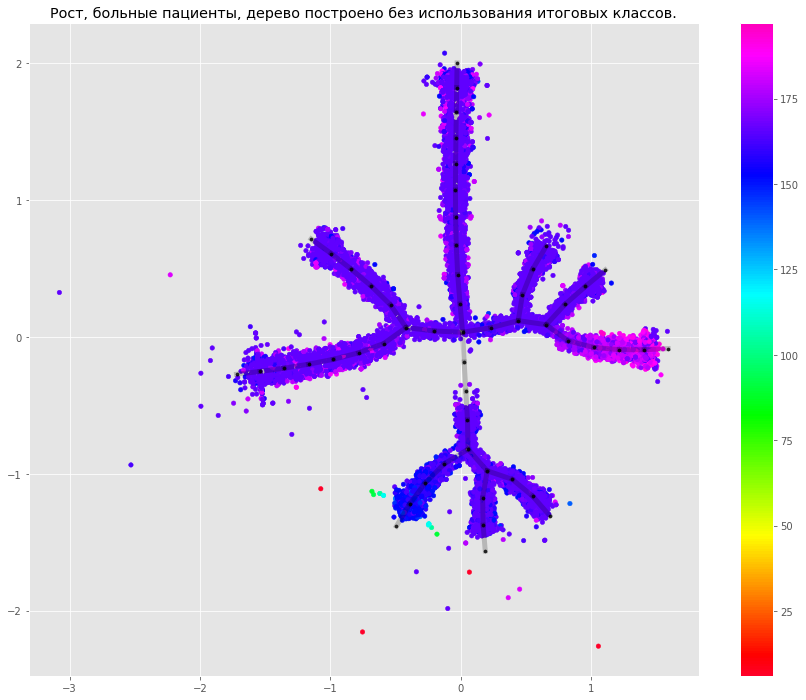

In [39]:
for tree, X_pca, data_orig, components, mnval, var_names, data_name in zip(PTB_tree_norm, X_pca_norm, datasets_orig, 
                                                               components_norm, mnval_norm, variable_names, data_names):
    fig = plt.figure(figsize=figsize)
    # tree_extended, X, X_original, v, mean_val, 'k', variable_names
    visualize_eltree_with_data(tree, X_pca, data_orig, components, mnval, 'k', var_names,
                               Color_by_feature='HEIGHT', cmap='gist_rainbow', add_color_bar=True)
    plt.title("Рост, " + data_name)
    plt.show()